In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


# Sources: 

https://medium.com/analytics-vidhya/logistic-regression-from-scratch-multi-classification-with-onevsall-d5c2acf0c37c

https://dmkothari.github.io/Machine-Learning-Projects/SVM_with_MNIST.html

https://datascience.stackexchange.com/questions/55545/in-cnn-why-do-we-increase-the-number-of-filters-in-deeper-convolution-layers-fo


https://github.com/yawen-d/Logistic-Regression-on-MNIST-with-NumPy-from-Scratch



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Load our Data and remove the test labels for now

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/logistic_regression/train.csv', delimiter=',')
train_data = train_data.iloc[:, :-1]
train_results = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/logistic_regression/train_result.csv",
                                delimiter=',')
our_y_train = train_results['Class']
num_inputs = train_data.shape[1]
num_classes = len(set(our_y_train))

# Define our Helper Functions 


In [ ]:
# helper functions
def sigmoid_function(z):
    exp_list = np.exp(z)
    result = 1 / sum(exp_list) * exp_list
    result = result.reshape((len(z), 1))
    return result


def neg_log_loss_function(pred, label):
    loss = -np.log(pred[int(label)])
    return loss

# Gradient Descent with minibatching

In [ ]:
def gradiend_descent_with_mini_batching(param, x_batch, y_batch):
    batch_size = x_batch.shape[0]
    w_grad_list = []
    b_grad_list = []
    batch_loss = 0
    for i in range(batch_size):
        x, y = x_batch[i], y_batch[i]
        x = x.reshape((1568, 1))  
        E = np.zeros((num_classes, 1)) 
        E[y][0] = 1
        pred = sigmoid_function(np.matmul(param['w'], x) + param['b'])
        loss = neg_log_loss_function(pred, y)
        batch_loss += loss
        w_grad = E - pred
        w_grad = - np.matmul(w_grad, x.reshape((1, 1568)))
        w_grad_list.append(w_grad)
        b_grad = -(E - pred)
        b_grad_list.append(b_grad)

    dw = sum(w_grad_list) / batch_size
    db = sum(b_grad_list) / batch_size
    return dw, db, batch_loss

def eval(param, x_data, y_data):
    loss_list = []
    w = param['w'].transpose()
    dist = np.array([np.squeeze(sigmoid_function(np.matmul(x_data[i], w))) for i in range(len(y_data))])

    result = np.argmax(dist, axis=1)
    accuracy = sum(result == y_data) / float(len(y_data))
    loss_list = [neg_log_loss_function(dist[i], y_data[i]) for i in range(len(y_data))]
    loss = sum(loss_list)
    return loss, accuracy

In [ ]:
def train(param, x_train, y_train):
    num_epoches = 15
    batch_size = 10
    learning_rate = 0.005
    test_loss_list, test_accu_list = [], []

    for epoch in range(num_epoches):
        # select the random sequence of training set
        rand_indices = np.random.choice(x_train.shape[0], x_train.shape[0], replace=False)
        num_batch = int(x_train.shape[0] / batch_size)
        batch_loss100 = 0
        # for each batch of train data
        for batch in range(num_batch):
            index = rand_indices[batch_size * batch:batch_size * (batch + 1)]
            x_batch = x_train[index]
            y_batch = y_train[index]
            # calculate the gradient w.r.t w and b
            dw, db, batch_loss = gradiend_descent_with_mini_batching(param, x_batch, y_batch)
            batch_loss100 += batch_loss
            param['w'] -= learning_rate * dw
            param['b'] -= learning_rate * db
            if batch % 100 == 0:
                message = 'Epoch %d, Batch %d, Loss %.2f' % (epoch + 1, batch, batch_loss)
                batch_loss100 = 0
        train_loss, train_accu = eval(param, x_train, y_train)
        test_loss_list.append(train_loss)
        test_accu_list.append(train_accu)
        message = 'Epoch %d, Train Loss %.2f, Train Accu %.4f,' % (
        epoch + 1, train_loss, train_accu)
        print(message)
    return test_loss_list, test_accu_list

In [ ]:
weights = np.random.randn(num_classes, num_inputs) / np.sqrt(num_classes * num_inputs)
biases = np.random.randn(num_classes, 1) / np.sqrt(num_classes)  # (19*1)

param = {
        'w': weights,  # (10*784)
        'b': biases # (10*1)
    }
train_data = np.float32(train_data)
our_y_train = np.int32(our_y_train)

print(train_data.shape)
print(our_y_train.shape)
print(num_classes)

(50000, 1568)
(50000,)
19


In [ ]:
loss_list, accu_list = train(param,train_data, our_y_train)

Epoch 1, Train Loss 119460.20, Train Accu 0.1899,
Epoch 2, Train Loss 115847.36, Train Accu 0.2070,
Epoch 3, Train Loss 113826.04, Train Accu 0.2237,
Epoch 4, Train Loss 112537.60, Train Accu 0.2243,
Epoch 5, Train Loss 111287.55, Train Accu 0.2359,
Epoch 6, Train Loss 110650.76, Train Accu 0.2380,
Epoch 7, Train Loss 110843.66, Train Accu 0.2394,
Epoch 8, Train Loss 110260.29, Train Accu 0.2411,
Epoch 9, Train Loss 109348.80, Train Accu 0.2473,
Epoch 10, Train Loss 109517.85, Train Accu 0.2447,
Epoch 11, Train Loss 108966.12, Train Accu 0.2485,
Epoch 12, Train Loss 108947.83, Train Accu 0.2474,
Epoch 13, Train Loss 109159.86, Train Accu 0.2499,
Epoch 14, Train Loss 109429.16, Train Accu 0.2422,
Epoch 15, Train Loss 109016.18, Train Accu 0.2526,


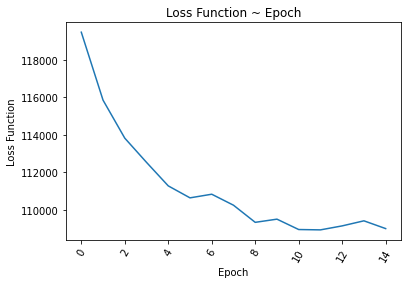

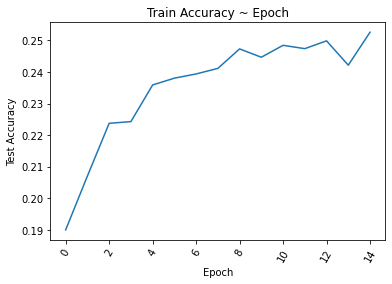

In [ ]:
plt.plot(loss_list)
plt.ylabel('Loss Function')
plt.xlabel('Epoch')
plt.xticks(rotation=60)
plt.title('Loss Function ~ Epoch')
plt.show()

plt.plot(accu_list)
plt.ylabel('Test Accuracy')
plt.xlabel('Epoch')
plt.xticks(rotation=60)
plt.title('Train Accuracy ~ Epoch')
plt.show()


In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/logistic_regression/test.csv', delimiter=',')
test_data = test_data.iloc[:, :-1]

loss_list = []
w = param['w'].transpose()
test_data = np.float32(test_data)
sigmoid_function(np.matmul(test_data[0], w))

dist = np.array([np.squeeze(sigmoid_function(np.matmul(test_data[i], w))) for i in range(len(test_data))])
result = np.argmax(dist, axis=1)

In [ ]:
print(result)

[10 14 14 ...  4  4  6]
